###### Name - Abhinav saini

# Task 1 :-

# Data preparation and customer analytics

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

##### The background information for this task :-

        ♦ I am part of Quantium’s retail analytics team and have been approached by our client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
        ♦ The insights from my analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.
   #### Here is task :-
   
       ♦ I need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so I need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.
       
               • Examine transaction data - check for missing data, anomalies, outliers and clean them
               • Examine customer data - similar to above transaction data
               • Data analysis and customer segments - create charts and graphs, note trends and insights
               • Deep dive into customer segments - determine which segments should be targetted

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# for data visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [2]:
purchase_data = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Data Exploration

In [4]:
# Basic Information of dataset(QVI_purchase_behaviour)
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
# Basic Information of dataset(QVI_transaction_data)
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
# Statistical Summary of QVI_purchase_behaviour data
purchase_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


In [7]:
# Statistical Summary of QVI_transaction_data data
transaction_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,264836.0,43464.036260,105.389282,43282.0,43373.0,43464.0,43555.00,43646.0
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


#### Checking missing values

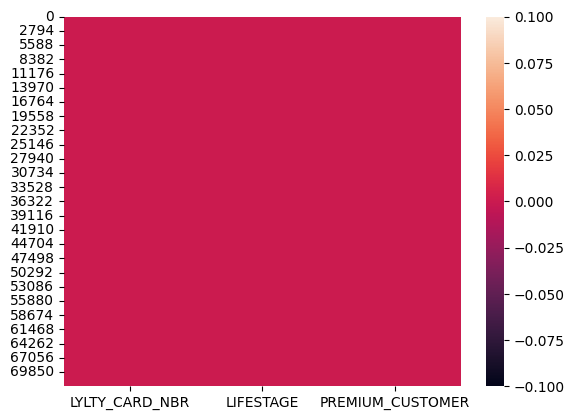

In [8]:
### Checking missing values of QVI_purchase_behaviour data
sns.heatmap(purchase_data.isnull())
plt.show()

In [9]:
purchase_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

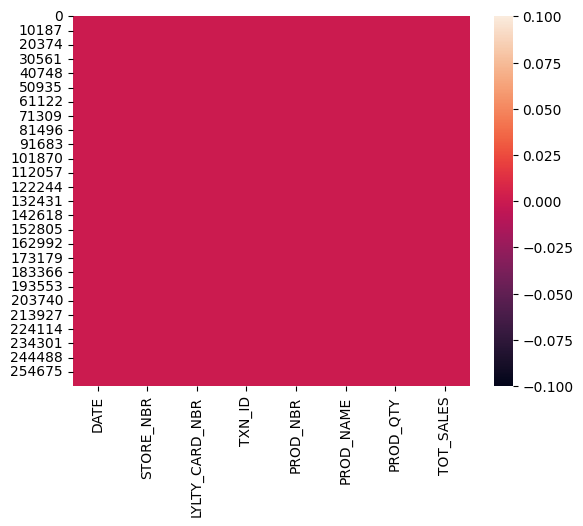

In [10]:
### Checking missing values of QVI_transaction_data
sns.heatmap(transaction_data.isnull())
plt.show()

In [11]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

                   •♦• As we can see there is no missing values in both dataset.

#### Analyzing and Removing Outliers

In [12]:
### Merging both dataset
merged_data = pd.merge(purchase_data, transaction_data, on = 'LYLTY_CARD_NBR', how = 'right')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


        •♦• We can see "DATE" column is not in proper format, so we will change it.

In [13]:
print(len(merged_data))
print(len(transaction_data))

264836
264836


In [14]:
### Basic Information of merged_data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


#### Date column is not in proper format. so, date column should be datetime format

In [15]:
from datetime import date, timedelta

start = date(1899, 12, 30)
new_date_format = []
for date in merged_data["DATE"]:
  delta = timedelta(date)
  new_date_format.append(start + delta)

In [16]:
merged_data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(merged_data["DATE"].dtype)

datetime64[ns]


#### Analyzing the product name column (PROD_NAME) to make sure all items are chips

In [17]:
merged_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [18]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()

In [19]:
word_counts = {}
def count_words(line):
  for word in line:
    if word not in word_counts:
      word_counts[word] = 1
    else:
      word_counts[word] += 1
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending = False))

175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 220, dtype: int64


In [20]:
print("\n ----- Statistical Summary of Merged Data ----- \n")
print(merged_data.describe())
print("\n ----- Basic Information of Merged Data ----- \n")
print(merged_data.info())


 ----- Statistical Summary of Merged Data ----- 

       LYLTY_CARD_NBR                           DATE     STORE_NBR  \
count    2.648360e+05                         264836  264836.00000   
mean     1.355495e+05  2018-12-30 00:52:12.879215616     135.08011   
min      1.000000e+03            2018-07-01 00:00:00       1.00000   
25%      7.002100e+04            2018-09-30 00:00:00      70.00000   
50%      1.303575e+05            2018-12-30 00:00:00     130.00000   
75%      2.030942e+05            2019-03-31 00:00:00     203.00000   
max      2.373711e+06            2019-06-30 00:00:00     272.00000   
std      8.057998e+04                            NaN      76.78418   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.648360e+05  264836.000000  264836.000000  264836.000000  
mean   1.351583e+05      56.583157       1.907309       7.304200  
min    1.000000e+00       1.000000       1.000000       1.500000  
25%    6.760150e+04      28.000000       2.000000 

In [21]:
merged_data["PROD_QTY"].value_counts(bins=4).sort_index()

PROD_QTY
(0.8, 50.75]       264834
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: count, dtype: int64

        ♦ From above binning we see that "PROD_QTY" values above 50.75

In [22]:
merged_data.sort_values(by="PROD_QTY", ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,201060,YOUNG FAMILIES,Premium,2019-05-18,201,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,219004,YOUNG SINGLES/COUPLES,Mainstream,2018-08-14,219,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,261331,YOUNG SINGLES/COUPLES,Mainstream,2019-05-19,261,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0


        ♦ Two outliers of value 200 in PROD_QTY will be removed. Both entries are by the same customer and will be examined by this customer's transactions.

In [23]:
merged_data = merged_data[merged_data["PROD_QTY"] < 6]

In [24]:
len(merged_data[merged_data["LYLTY_CARD_NBR"]==226000])

0

In [25]:
merged_data["DATE"].describe()

count                           264834
mean     2018-12-30 00:52:10.292938240
min                2018-07-01 00:00:00
25%                2018-09-30 00:00:00
50%                2018-12-30 00:00:00
75%                2019-03-31 00:00:00
max                2019-06-30 00:00:00
Name: DATE, dtype: object

 ###### ♦ There are 365 days in a year but in the DATE column there are only 364 unique values so one is missing.

In [26]:
pd.date_range(start=merged_data["DATE"].min(), 
              end=merged_data["DATE"].max()).difference(merged_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

        ♦ Using the difference method we see that 2018-12-25 was a missing date

In [27]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), 
                                                   end = merged_data["DATE"].max()), 
                                     name="DATE"), merged_data, on = "DATE", how = "left")

In [28]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3), color='orange')
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("Sales of December 2018", fontsize=20, fontweight='bold', color='brown')
plt.xlabel("Date", fontsize=15, fontweight='bold', color='brown')
plt.ylabel("Number of Sales", fontsize=10, fontweight='bold', color='brown')
plt.savefig("Sales of December 2018.png", bbox_inches="tight")
plt.grid()
plt.legend()
plt.show()

AttributeError: module 'pandas' has no attribute 'datetime'

In [ ]:
check_null_date["DATE"].value_counts().sort_values().head()

###### The day with no transaction is a Christmas Day (25th December). That is when the store is closed. So there is no anomaly in this.

#### Analyzing Packet sizes

In [ ]:
merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = merged_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")

print("\n ----- Statistical Summary ----- \n")
print(pack_sizes.describe())

print("\n ----- Value Counts ----- \n")
print(pack_sizes.value_counts())

print("\n ----- Histogram of Packet sizes ----- \n")
pack_sizes.plot.hist()
plt.show()

In [ ]:
merged_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

      ♦ Some product names are written in more than one way. Example : Dorito and Doritos, Grains and GrnWves, Infusions and Ifzns, Natural and NCC, Red and RRD, Smith and Smiths and Snbts and Sunbites.

In [ ]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Red"].value_counts()

In [ ]:
merged_data["Cleaned_Brand_Names"] = merged_data["PROD_NAME"].str.split().str[0]

In [ ]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [ ]:
merged_data["Cleaned_Brand_Names"] = merged_data.apply(lambda line: clean_brand_names(line), axis=1)

In [ ]:
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(15,8), color='darkgoldenrod')
plt.title("Brand Name", fontsize=25, fontweight='bold', color='olive')
plt.grid(color='olive', linestyle='--')
plt.savefig("Brand Names.png", bbox_inches="tight")
plt.show()

In [ ]:
sns.heatmap(merged_data.isnull())
plt.show()

In [ ]:
merged_data.isnull().sum()

#### Questions :-
        ♦ Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is ?
        ♦ How many customers are in each segment ?
        ♦ How many chips are bought per customer by segment ?
        ♦ What is the average chip price by customer segment ? 

In [ ]:
grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

In [ ]:
grouped_sales["sum"].sum()

In [ ]:
grouped_sales["sum"].sort_values().plot.barh(figsize=(15,8), color='darkgoldenrod')
plt.grid(color='olive', linestyle='--')
plt.show()

In [ ]:
# Values of each group
bars1 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]
 
bars1_text = (bars1 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
tmp_bar = np.add(bars1, bars2)
prem_bar = plt.barh(r, bars3, left=bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

In [ ]:
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("\n ----- Top contributor per LIFESTAGE by PREMIUM category ----- \n")
print(stage_agg_prem)

#### The top 3 total sales contributor segment are (in order) :-

                1. Older families (Budget) $156,864
            2. Young Singles/Couples (Mainstream) $147,582
                3. Retirees (Mainstream) $145,169

In [ ]:
unique_cust = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

In [ ]:
unique_cust.sort_values().plot.barh(figsize=(15,8), color='darkgoldenrod')
plt.grid(color='olive', linestyle='--')
plt.show()

In [ ]:
# Values of each group
ncust_bars1 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]
ncust_bars2 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]
ncust_bars3 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]
 
ncust_bars1_text = (ncust_bars1 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / sum(unique_cust)).apply("{:.1%}".format)
 
# # Names of group and bar width
#names = unique_cust.index.get_level_values("LIFESTAGE").unique()

# # The position of the bars on the x-axis
#r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# # Create brown bars
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")
# # Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")
# # Create green bars (top)
prem_bar = plt.barh(r, ncust_bars3, left=ncust_bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, ncust_bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, ncust_bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, ncust_bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage", fontsize=15, fontweight='bold', color='darkgoldenrod')
plt.xlabel("Unique Customers", fontsize=15, fontweight='bold', color='darkgoldenrod')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage", fontsize=20, fontweight='bold', color='darkgoldenrod')

plt.savefig("lifestage_customers.png", bbox_inches="tight")

# View
plt.show()

###### The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll analyze if the "Older - Budget" segment has:

###### High Frequency of Purchase and Average Sales per Customer compared to the other segment.

In [ ]:
freq_per_cust = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

           •♦• The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:

High Frequency of Purchase and, Fairly high unique number of customer in the segment

In [ ]:
grouped_sales.sort_values(ascending=False, by="mean")

        •♦• Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples". The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), but we'll find out by examining if the difference is statistically significant.

In [ ]:
from scipy.stats import ttest_ind
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

a = merged_data[young_midage & mainstream]["TOT_SALES"]
b = merged_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

       •♦• P-Value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.

Next, let's look examine what brand of chips the top 3 segments contributing to Total Sales are buying.

In [ ]:
merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

In [ ]:
for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print("----------",stage, '-', prem,"----------\n")
        summary = merged_data[(merged_data["LIFESTAGE"] == stage) 
                              & (merged_data["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(6,2), color='orangered')
        plt.show()

    •♦• Every segment had Kettle as the most purchased brand. Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand. "YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand.

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

temp = merged_data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)

frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

        •♦• By looking at our a-priori analysis, we can conclude that Kettle is the brand of choice for most segment.

Next, we'll find out the pack size preferences of different segments

In [ ]:
merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print("----------",stage, '-', prem,"----------\n")
        summary = merged_pack[(merged_pack["LIFESTAGE"] == stage) 
                              & (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(6,2), color='olive')
        plt.show()

In [ ]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() 
 / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

In [ ]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() 
 / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)

plt.title("Average purchase quantity per segment", fontsize=20, fontweight='bold', color='darkorange')
plt.xlabel("Lifestage", fontsize=15, fontweight='bold', color='darkorange')
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")
plt.show()

In [ ]:
#Average chips price per transaction by segments

print("\n ----- Average chips price per transaction by segments ----- \n")
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

In [ ]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)

plt.xlabel("Lifestage", fontsize=15, fontweight='bold', color='darkorange')
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
z = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

## Insights from Data :-

        Top 3 total sales contributor segment are :-
        
                                                    i. Older families (Budget) $156,864
                                               ii. Young Singles/Couples (Mainstream) $147,582
                                                  iii. Retirees (Mainstream) $145,169                                                  
                                                  
    •♦• Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.
    
    •♦• Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
    
    •♦• Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
    
    •♦• The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
    
    •♦• Chips brand Kettle is dominating every segment as the most purchased brand.
    
    •♦• Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
    
    •♦• Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

## Future Recommendations :-

        •♦• Older Families: Focus on the Budget segment. Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase. Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.
        
        •♦• Young Singles/Couples: Focus on the Mainstream segment. This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment. Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.
        
        •♦• Retirees: Focus on the Mainstream segment. Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.
        
        •♦• General: All segments has Kettle as the most frequently purchased brand and 175gr (regardless of brand) followed by 150gr as the preferred chip size. When promoting chips in general to all segments it is good to take advantage of these two points.

                                                            •♦•♦•♦•